In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import array
import scipy as sp
import scipy.interpolate
import re
import pickle as pickle
def unPackRawFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    gas_density = y[:,4]
    gas_metallicity = y[:,5]
   
    return distance, pec_vel, temp, HI_density, gas_density, gas_metallicity

def getPos(path_LOS,linenumber=8):
    """
    the start position of the LOS is given inside each file, (in the comments)
    this function parses the comments to get that information
    """
    f = open(path_LOS)
    x = f.readlines()[linenumber]
    answer = re.search('\(([^)]+)', x).group(1)
    arr = np.array(answer.split(','),dtype=float)
    return arr

def getDir(path_LOS,linenumber=8):
    """
    the direction of the LOS is given inside each file, (in the comments)
    this function parses the comments to get that information
    """
    f = open(path_LOS)
    x = f.readlines()[linenumber]
    answer = re.search('\(([^)]+)', x.split(', ')[1]).group(1)
    arr = np.array(answer.split(','),dtype=float)
    return arr


def convertSphereToCart(theta, phi):
    "converts a unit vector in spherical to cartesian, needed for getGalaxies"
    return np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])

In [2]:
import astropy
import numpy as np

In [1]:
from astropy.cosmology import WMAP9 as cosmo

In [5]:
cosmo.comoving_distance(5.29) - cosmo.comoving_distance(5.09)

<Quantity 104.30174027 Mpc>

In [7]:
cosmo.comoving_distance(6.375) - cosmo.comoving_distance(6.13)

<Quantity 100.9307162 Mpc>

In [8]:
6.375 - 6.13

0.2450000000000001

In [25]:
cosmo.comoving_distance(3.82)

<Quantity 7212.22408724 Mpc>

In [26]:
7212.2241-7040

172.22410000000036

In [29]:
172.22410000000036/0.72*(1/(1+3.82))

49.62658483171979

In [4]:
#redshift 5.88
def change_distance(distance):
    '''change Cmpc to wavelegnth,starting position changes to 912'''
    distance_wavelength = []
    distance_wavelength.append(5.88)
    distance_difference = 5.88
    for i in range(len(distance)-1):
        '''change to mpc, adding distance to wavelength to original structure'''
        distance_difference += (distance[i +1 ] - distance[i])/100 * 0.23 
        distance_wavelength.append(distance_difference)
    return distance_wavelength
    

def main(start):
    '''everything together for beckers' 21'''
    '''sigma is the cross section'''
    sigma = 6.3e-18
    crd = 0
    all = []
    total_tau = []
    for i in range(1):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        '''factor for cmpc to mpc''''''a_factor and hubble constant'''
        factor = 0.1453/0.68

        distance, pec_vel, temp, HI_density,gas_density, gas_metallicity = unPackRawFile(raw_path)
        distance_wavelength = change_distance(distance)
        distance_cm = distance*factor*3.086e+24
        hubble_constant  = 70
        omega = 0.3
        c = 300000
        z_p = [0]
        distance_difference = 0
        for i in range(len(distance)-1):
            distance_difference += (distance[i +1 ] - distance[i])/100 * 0.23 
            z_p.append(distance_difference)
        second_half = (np.power(np.add(1,z_p),-11/2))
        new_sigma = np.multiply(sigma,np.power(((1+start)/(np.add(1,distance_wavelength))),-3))
        HI_graph = [0]
        sigma_graph = [new_sigma[0]]
        tau = []
        tau.append(0)
        k = 0
        distance_graph = [0]
        distance_integral = [0]
        second_half_graph = [0]
        while( k <len(distance)):
                distance_graph.append(distance_wavelength[k])
                distance_integral.append(z_p[k])
                HI_graph.append(HI_density[k])
                sigma_graph.append(new_sigma[k])
                second_half_graph.append(second_half[k])
                tau.append(c/(hubble_constant*omega**(1/2))*((1+start)**3*integrate.cumtrapz(np.multiply(np.multiply(HI_graph,sigma_graph),second_half_graph),distance_integral,initial = 0)[-1])*3.086e+24)
                k+=1
        total_tau.append([tau,distance_graph])
    return total_tau



In [5]:
tau_result = main(5.88)

/tmp/ipykernel_17511/1078877145.py:1: RuntimeWarning: overflow encountered in power
  plt.scatter(tau_result[0][1],np.power(np.e,tau_result[0][0]))


Text(0, 0.5, 'tau_ll')

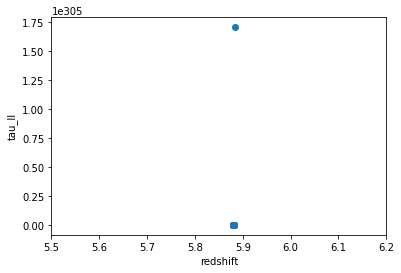

In [6]:
plt.scatter(tau_result[0][1],np.power(np.e,tau_result[0][0]))
plt.xlim(5.5,6.2)
plt.xlabel('redshift')
plt.ylabel('tau_ll')